<a href="https://colab.research.google.com/github/norayehia/graduation-facial-occluded-on-vrap-company/blob/main/sufflewithoutagmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



#without datagenerator
from google.colab import drive
drive._mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import glob
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import tensorflow.compat.v2 as tf
from keras import backend as k
from keras.applications.mobilenet import MobileNet
from keras.applications import imagenet_utils
import keras.applications
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.keras.utils import Sequence
from tensorflow.python.util.tf_export import keras_export
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from sklearn.metrics import classification_report
import seaborn as sns


import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

## Implementing Data Generators

In [ ]:
testpath = "/content/drive/MyDrive/graduation2/graduation/Final Dataset/testset_occluded_new_shuffled"
classes = ['Surprise', 'Fear', 'Disgust', 'Happy', 'Sad', 'Anger', 'Neutral']

test_size = []

for folder_index,folder in enumerate(classes):
  test = glob.glob(testpath + "/" + folder + "/*")
  test_size.append(len(test))

print(test_size)

[200, 200, 200, 200, 200, 200, 200]


In [ ]:
trainpath = "/content/drive/MyDrive/graduation2/graduation/Final Dataset/trainset_occluded_new_shuffled"
classes = ['Surprise', 'Fear', 'Disgust', 'Happy', 'Sad', 'Anger', 'Neutral']

train_size = []

for folder_index,folder in enumerate(classes):
  train = glob.glob(trainpath + "/" + folder + "/*")
  train_size.append(len(train))

print(train_size)

[2312, 884, 2145, 2961, 2109, 2103, 2957]


In [ ]:
preprocess_input= tf.keras.applications.mobilenet.preprocess_input

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
generator = datagen.flow_from_directory(trainpath, target_size=(224, 224), batch_size=32, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(trainpath, # same directory as training data
    target_size=(224, 224), batch_size=32, class_mode='categorical', subset='validation') # set as validation data

Found 12380 images belonging to 7 classes.
Found 3091 images belonging to 7 classes.


https://towardsdatascience.com/image-data-generators-in-keras-7c5fc6928400

In [ ]:
from operator import length_hint
print('num of samples:',generator.samples)
print('num of classes:',len(generator.class_indices))
print('num sample per class:',int(generator.samples/len(generator.class_indices)))

num of samples: 12380
num of classes: 7
num sample per class: 1768


In [ ]:
from operator import length_hint
print('num of samples:',validation_generator.samples)
print('num of classes:',len(validation_generator.class_indices))
print('num sample per class:',int(validation_generator.samples/len(validation_generator.class_indices)))

num of samples: 3091
num of classes: 7
num sample per class: 441


In [ ]:
"""
gen_size = []

for folder_index,folder in enumerate(classes):
  train = glob.glob(trainpath + "/" + folder + "/*")
  gen_size.append(len(train))

print(gen_size)

"""

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
test_generator = test_datagen.flow_from_directory(testpath, target_size=(224, 224), batch_size=32, class_mode='categorical',shuffle=False)

Found 1400 images belonging to 7 classes.


In [ ]:
from operator import length_hint
print('num of samples:',test_generator.samples)
print('num of classes:',len(test_generator.class_indices))
print('num sample per class:',int(test_generator.samples/len(test_generator.class_indices)))

num of samples: 1400
num of classes: 7
num sample per class: 200


In [ ]:
k.clear_session()

new_input = keras.Input(shape=(224, 224, 3))

In [ ]:
base_model=MobileNet(input_shape=(224, 224, 3), include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.

preds=Dense(7,activation='softmax')(x) #final layer with softmax activation

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:


model = Model(inputs=base_model.inputs, outputs=preds)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
len(model.layers)

89

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
# model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
#               metrics=[keras.metrics.SparseCategoricalAccuracy()])
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=5e-3), loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
#es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
version = 50
epoch = 20
histories = []

for i in range(5):
  csv_logger = CSVLogger('/content/drive/MyDrive/graduation3/runn/history' + str(epoch * (i + 1)) + '.log', separator=',', append=False)
  #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
  history = model.fit(generator, validation_data = validation_generator, epochs = epoch, callbacks = [csv_logger])
  histories.append(history)
  model.save('/content/drive/MyDrive/graduation3/runn/history' + 'MobileNetAlllayers.' + str(epoch * (i + 1)))

Epoch 1/20
387/387 [==============================] - 2239s 6s/step - loss: 1.3062 - categorical_accuracy: 0.5447 - val_loss: 3.2815 - val_categorical_accuracy: 0.3290
Epoch 2/20
387/387 [==============================] - 178s 460ms/step - loss: 0.9756 - categorical_accuracy: 0.6577 - val_loss: 3.1269 - val_categorical_accuracy: 0.4588
Epoch 3/20
387/387 [==============================] - 179s 461ms/step - loss: 0.8868 - categorical_accuracy: 0.6889 - val_loss: 1.5234 - val_categorical_accuracy: 0.5510
Epoch 4/20
387/387 [==============================] - 179s 462ms/step - loss: 0.8253 - categorical_accuracy: 0.7134 - val_loss: 1.9063 - val_categorical_accuracy: 0.5121
Epoch 5/20
387/387 [==============================] - 179s 462ms/step - loss: 0.7719 - categorical_accuracy: 0.7313 - val_loss: 1.9043 - val_categorical_accuracy: 0.5801
Epoch 6/20
387/387 [==============================] - 179s 462ms/step - loss: 0.7199 - categorical_accuracy: 0.7511 - val_loss: 2.2401 - val_categorical

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/graduation3/runn/historyMobileNetAlllayers.60')


In [ ]:
y_true = test_generator.classes

In [ ]:
y_true

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
y_pred_prob = model.predict(test_generator)

In [ ]:
y_pred = tf.argmax(y_pred_prob, axis=-1)

In [ ]:
y_pred = y_pred.numpy()
y_pred

array([1, 6, 0, ..., 6, 6, 6])

In [ ]:
print(classification_report(y_true, y_pred, target_names = classes))

              precision    recall  f1-score   support

    Surprise       0.89      0.89      0.89       200
        Fear       0.87      0.98      0.92       200
     Disgust       0.88      0.99      0.94       200
       Happy       0.99      0.93      0.96       200
         Sad       0.88      0.85      0.87       200
       Anger       0.98      0.74      0.85       200
     Neutral       0.82      0.89      0.85       200

    accuracy                           0.90      1400
   macro avg       0.90      0.90      0.90      1400
weighted avg       0.90      0.90      0.90      1400



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[178,   5,   2,   0,   1,   0,  14],
       [  3, 196,   0,   0,   1,   0,   0],
       [  0,   0, 199,   0,   0,   0,   1],
       [  2,   1,   1, 185,   2,   2,   7],
       [  3,   5,  12,   0, 171,   1,   8],
       [  4,  17,   8,   2,  11, 149,   9],
       [ 11,   1,   3,   0,   8,   0, 177]])

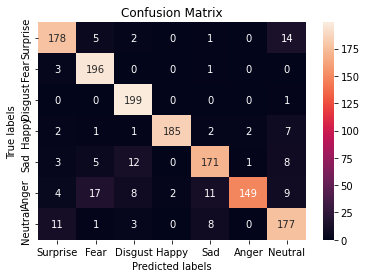

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [ ]:
# concatenate history from all the log files
hist_df = pd.DataFrame()
epoch = 20
for i in range(3):
  df = pd.read_csv('/content/drive/MyDrive/graduation3/runn/history' + str(epoch * (i + 1)) + '.log', delimiter = ',')
  hist_df = pd.concat([hist_df, df], ignore_index = True)

hist_df

,epoch,categorical_accuracy,loss,val_categorical_accuracy,val_loss
0,0,0.544669,1.306223,0.329020,3.281532
1,1,0.657674,0.975634,0.458751,3.126937
2,2,0.688934,0.886789,0.550954,1.523355
3,3,0.713409,0.825276,0.512132,1.906306
4,4,0.731341,0.771927,0.580071,1.904266
5,5,0.751131,0.719943,0.588483,2.240146
6,6,0.769225,0.664557,0.513103,3.885420
7,7,0.781099,0.633196,0.544484,3.154587
8,8,0.796850,0.584412,0.530573,2.462096
9,9,0.816882,0.528259,0.561631,3.235972


In [ ]:
scores = model.evaluate(test_generator)

44/44 [==============================] - 7s 154ms/step - loss: 0.9139 - categorical_accuracy: 0.8964


In [ ]:
print("Accuracy = ", scores[1])

Accuracy =  0.8964285850524902


In [ ]:
training_scores = model.evaluate(generator)
print("Accuracy = ", training_scores[1])

387/387 [==============================] - 61s 157ms/step - loss: 0.0699 - categorical_accuracy: 0.9778
Accuracy =  0.9777867794036865


In [ ]:
validation_scores = model.evaluate(validation_generator)
print("Accuracy = ", validation_scores[1])

97/97 [==============================] - 15s 151ms/step - loss: 3.5977 - categorical_accuracy: 0.6060
Accuracy =  0.6059527397155762


In [ ]:
epoch = 20
for i in range(3):
  log = pd.read_csv('/content/drive/MyDrive/graduation3/runn/history' + str(epoch * (i + 1)) + '.log')
  log = pd.DataFrame(log)
  print(log.shape)
  if(i == 0):
    logs = log.copy()
  else:
    pd.concat([logs,log])
    print(logs.shape)

(20, 5)
(20, 5)
(20, 5)
(20, 5)
(20, 5)


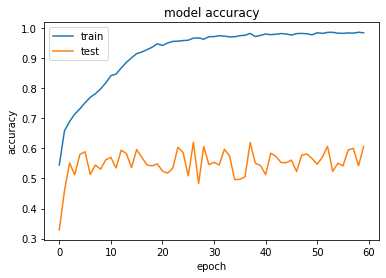

In [ ]:
# summarize history for accuracy
plt.plot(hist_df['categorical_accuracy'])
plt.plot(hist_df['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

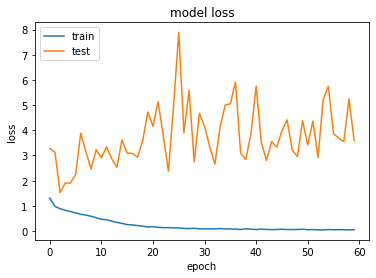

In [ ]:
# summarize history for loss
plt.plot(hist_df['loss'])
plt.plot(hist_df['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(k.eval(model.optimizer.lr))

0.005


In [ ]:
model100 = keras.models.load_model('/content/drive/MyDrive/graduation3/runn/historyMobileNetAlllayers.100')

In [ ]:
scores = model100.evaluate(test_generator)

44/44 [==============================] - 188s 4s/step - loss: 1.1941 - categorical_accuracy: 0.8979


In [ ]:
training_scores = model100.evaluate(generator)
print("Accuracy = ", training_scores[1])

In [ ]:
validation_scores = model100.evaluate(validation_generator)
print("Accuracy = ", validation_scores[1])

97/97 [==============================] - 416s 4s/step - loss: 5.7148 - categorical_accuracy: 0.5416
Accuracy =  0.5415723323822021


In [ ]:
y_pred_prob100 = model100.predict(test_generator)

In [ ]:
y_pred100 = tf.argmax(y_pred_prob100, axis=-1)

In [ ]:
print(classification_report(y_true, y_pred100, target_names = classes))

              precision    recall  f1-score   support

    Surprise       0.76      0.93      0.84       200
        Fear       0.93      0.86      0.89       200
     Disgust       0.92      0.96      0.94       200
       Happy       0.99      0.95      0.97       200
         Sad       0.94      0.84      0.89       200
       Anger       0.92      0.84      0.88       200
     Neutral       0.87      0.90      0.88       200

    accuracy                           0.90      1400
   macro avg       0.90      0.90      0.90      1400
weighted avg       0.90      0.90      0.90      1400

